In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
torch.manual_seed(42)

# Crear datos de entrenamiento (0 a 2π)
x_train = torch.linspace(0, 2 * torch.pi, 100).unsqueeze(1)  # (100, 1)
y_train = torch.sin(x_train)

# Agregar ruido gaussiano
noise = 0.1 * torch.randn_like(y_train)
y_train_noisy = y_train + noise


In [2]:
# Define a simple FCNN model
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.net(x)

# Initialize model, loss function, and optimizer
model = FCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train_noisy)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.4712
Epoch 100, Loss: 0.0611
Epoch 200, Loss: 0.0145
Epoch 300, Loss: 0.0072
Epoch 400, Loss: 0.0068
Epoch 500, Loss: 0.0067
Epoch 600, Loss: 0.0066
Epoch 700, Loss: 0.0089
Epoch 800, Loss: 0.0080
Epoch 900, Loss: 0.0067


In [3]:
# Generate test data
x_test = torch.linspace(0, 3 * torch.pi, 100).unsqueeze(1)
y_test = torch.sin(x_test)


In [4]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)


Test MSE: 0.0788


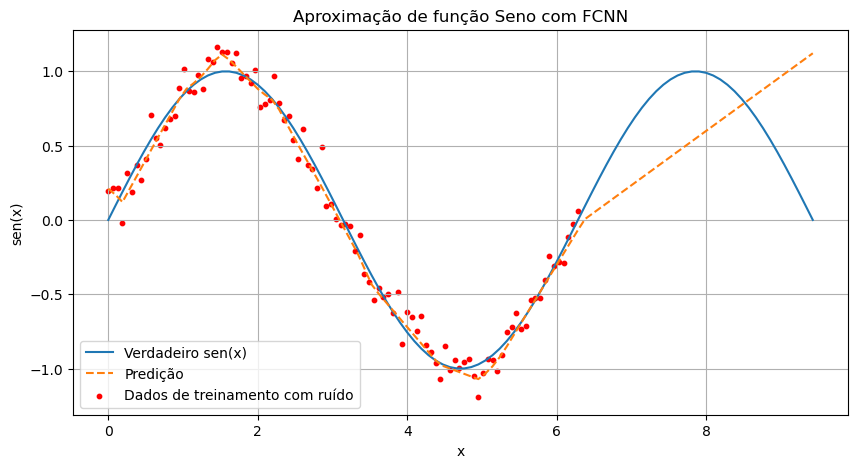

In [5]:
# Compute test loss
test_loss = criterion(y_pred, y_test)
print(f"Test MSE: {test_loss.item():.4f}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(x_test.numpy(), y_test.numpy(), label='Verdadeiro sen(x)')
plt.plot(x_test.numpy(), y_pred.numpy(), label='Predição', linestyle='--')
plt.scatter(x_train.numpy(), y_train_noisy.numpy(), color='red', s=10, label='Dados de treinamento com ruído')
plt.legend()
plt.title('Aproximação de função Seno com FCNN')
plt.xlabel('x')
plt.ylabel('sen(x)')
plt.grid(True)
plt.show()
